In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import mean_squared_error
from math import sqrt

import xgboost as xgb

import matplotlib.pyplot as plt#plot drawing
import seaborn as sns  # visualization tool

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['2017.csv', '2016.csv', '2015.csv']


In [2]:
data = pd.read_csv('../input/2017.csv', header=0)
data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


Correlation Map


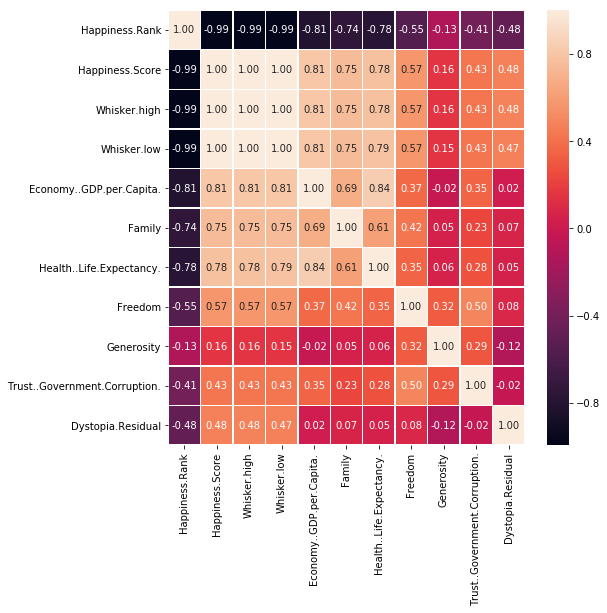

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [3]:
print('Correlation Map')
data.corr() 
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(data.corr(), annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.show()
data.describe()

In [5]:
dts = data.drop(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low'], axis=1)
msk = np.random.rand(len(dts)) < 0.8
train = dts[msk]
test = dts[~msk]

labels = data[msk]['Happiness.Score']/10
test_labels = data[~msk]['Happiness.Score']/10

In [6]:
eval_set = [(train, labels), (test, test_labels)]
eval_metric = ["logloss", "rmse"]

In [7]:
dtrain = xgb.DMatrix(train.values, labels.values)

In [8]:
param = {'max_depth':1, 'eta':2, 'silent':1, 'objective':'reg:linear', 'learning_rate': 0.1, 'n_estimators': 100 }
clf = xgb.XGBModel(**param)
clf.fit(train, labels,
        eval_set=eval_set,
        eval_metric=eval_metric,
        verbose=True
       )
evals_result = clf.evals_result()

[0]	validation_0-logloss:0.690107	validation_0-rmse:0.113637	validation_1-logloss:0.690742	validation_1-rmse:0.105084
[1]	validation_0-logloss:0.687455	validation_0-rmse:0.107651	validation_1-logloss:0.689169	validation_1-rmse:0.101278
[2]	validation_0-logloss:0.68523	validation_0-rmse:0.102364	validation_1-logloss:0.687693	validation_1-rmse:0.097571
[3]	validation_0-logloss:0.683319	validation_0-rmse:0.097606	validation_1-logloss:0.686594	validation_1-rmse:0.094726
[4]	validation_0-logloss:0.681656	validation_0-rmse:0.093272	validation_1-logloss:0.685178	validation_1-rmse:0.090928
[5]	validation_0-logloss:0.680204	validation_0-rmse:0.08934	validation_1-logloss:0.684429	validation_1-rmse:0.088866
[6]	validation_0-logloss:0.678908	validation_0-rmse:0.085685	validation_1-logloss:0.684269	validation_1-rmse:0.088432
[7]	validation_0-logloss:0.677748	validation_0-rmse:0.082272	validation_1-logloss:0.68343	validation_1-rmse:0.086048
[8]	validation_0-logloss:0.676706	validation_0-rmse:0.07910

[Text(0,0,'Economy..GDP.per.Capita.'),
 Text(0,0,'Family'),
 Text(0,0,'Health..Life.Expectancy.'),
 Text(0,0,'Freedom'),
 Text(0,0,'Generosity'),
 Text(0,0,'Trust..Government.Corruption.'),
 Text(0,0,'Dystopia.Residual')]

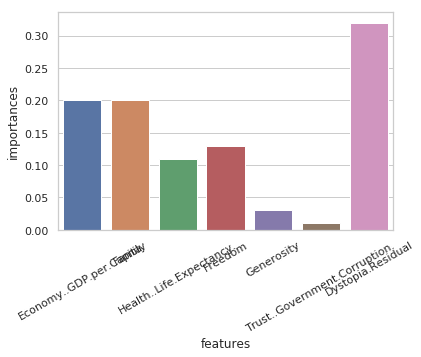

In [9]:
feature_df = pd.DataFrame(
    {'features': list(dts),
     'importances': clf.feature_importances_
    })
sns.set(style="whitegrid")
plot = sns.barplot(x="features", y="importances", data=feature_df)
plot.set_xticklabels(list(dts), rotation=30)

In [10]:
sqrt(mean_squared_error(test_labels, clf.predict(test)))

0.03346370901836123